In [29]:
from plot_helpers import *
from helpers import *

In [30]:
prediction_data_paths = glob.glob("predictions/predictions_L*.csv")
prediction_data_paths

['predictions\\predictions_L10.csv',
 'predictions\\predictions_L20.csv',
 'predictions\\predictions_L30.csv',
 'predictions\\predictions_L40.csv',
 'predictions\\predictions_L50.csv',
 'predictions\\predictions_L60.csv']

In [3]:
sizes = [10, 20, 30, 40, 50, 60]

In [4]:
all_data = collect_all_predictions(prediction_data_paths, system_sizes=sizes, filename="all_predictions.csv")

In [5]:
all_data.head()

,Temperature,P_low,P_high,std_low,std_high,L
0,0.52,0.988292,0.011708,0.000000,0.000000,10
1,0.54,0.988292,0.011708,0.000000,0.000000,10
2,0.56,0.988292,0.011708,0.000000,0.000000,10
3,0.58,0.988286,0.011714,0.000206,0.000206,10
4,0.60,0.988287,0.011713,0.000187,0.000187,10


In [6]:
all_data.isnull().values.any()

False

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1056 non-null   float64
 1   P_low        1056 non-null   float64
 2   P_high       1056 non-null   float64
 3   std_low      1056 non-null   float64
 4   std_high     1056 non-null   float64
 5   L            1056 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 45.5 KB


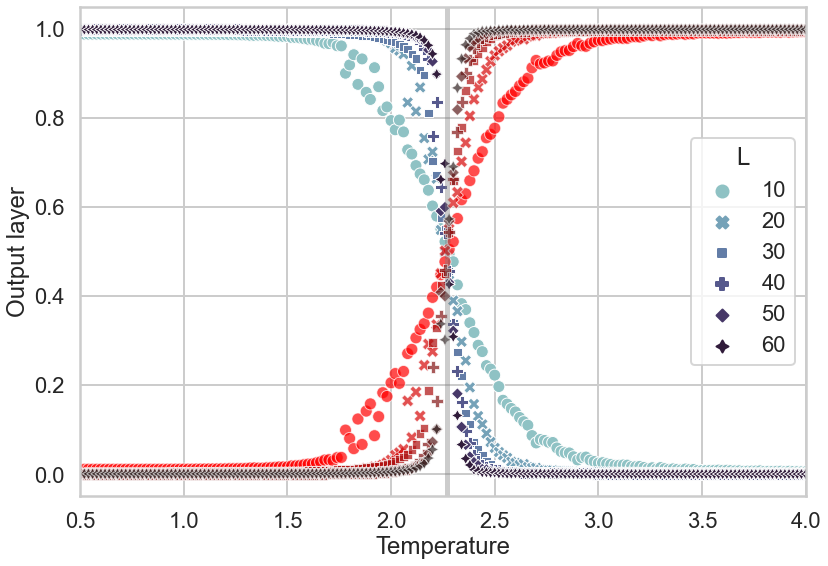

In [9]:
plot_predictions(all_data, filename="predictions.svg")

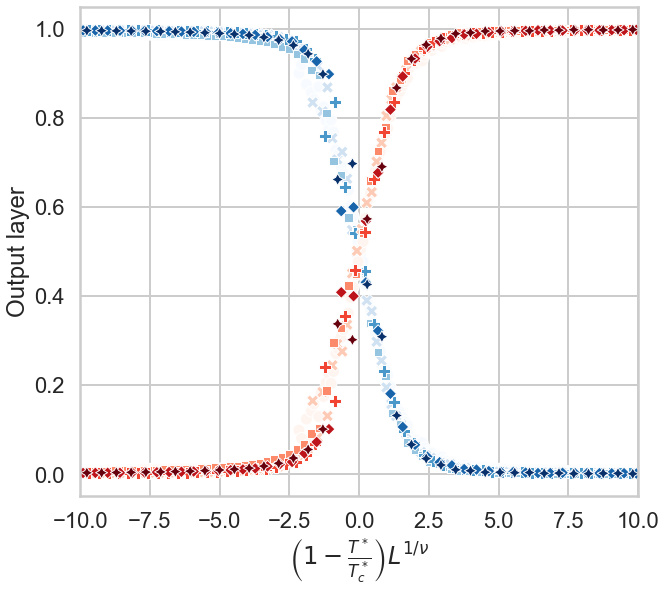

In [10]:
plot_collapsed_predictions(all_data, filename="collapsed_predictions.svg", figsize=(10,9))

In [11]:
intersections=determine_crossing_points(all_data, append_zero_value=True, system_sizes=sizes)

intercepts for L=10: [2.27622237]
intercepts for L=20: [2.259271]
intercepts for L=30: [2.27071416]
intercepts for L=40: [2.26985951]
intercepts for L=50: [2.27183835]
intercepts for L=60: [2.27457413]


In [24]:
intersections.to_csv("linear_data.csv")
intersections

,inv_L,Tc
0,0.000000,2.269185
6,0.016667,2.274574
5,0.020000,2.271838
4,0.025000,2.269860
3,0.033333,2.270714
2,0.050000,2.262846
1,0.100000,2.276222


In [25]:
(xfit, yfit) = fit_linregress(intersections.inv_L, intersections.Tc, return_stats=False, expand=True, x_factor=0.2, y_factor=1.1)

slope =  0.03382823503263262
intercept =  2.2695645083082256
R =  0.25509023654269436
p =  0.5808964094338754
Standard error =  0.057344241087899116


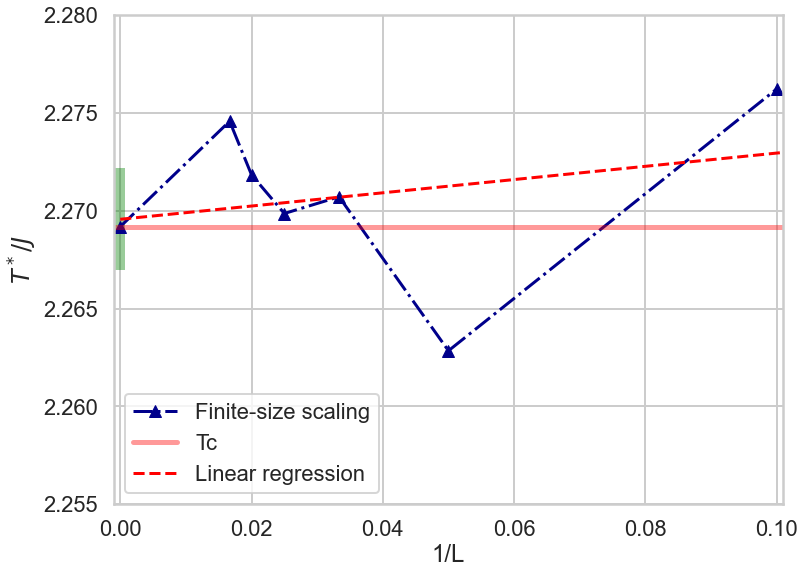

In [28]:
def plot_finite_size_scaling(intersect_data, plot_critic=True, fit_line=True, lin_regress_data=None, show_errorbars=True, errorbars=None, figsize=(12,9), filename="scaling2_results.svg"):
    Tc = 2/np.log(1+np.sqrt(2))
    fig, ax = plt.subplots(figsize=figsize)
    if not show_errorbars:
        ax.plot(intersect_data["inv_L"], intersect_data["Tc"], "-.^", color="darkblue", label="Finite-size scaling")
    else:
        if not errorbars:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=np.std(intersect_data["Tc"]),
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling")
        else:
            ax.errorbar(intersect_data["inv_L"], intersect_data["Tc"],
                        yerr=errorbars,
                        elinewidth=1, color="darkblue",
                        linestyle="-.", marker="^",
                        label="Finite size scaling result")
    if plot_critic:
        ax.axhline(y=Tc, xmin=0, xmax=1, color='red', linewidth=5, alpha=0.4, label="Tc")
    
    if fit_line and lin_regress_data:
        x_extended, y_fit = lin_regress_data
        ax.plot(x_extended, y_fit, "--r", label="Linear regression")
    
    ax.errorbar(0, 2.26956, yerr=0.0026, elinewidth=10, ecolor="green", alpha=0.4)
    ax.set_ylabel(r"$T^*/J$")
    ax.set_xlabel("1/L")
    ax.set_xlim([-0.001, 0.101])
    ax.set_ylim([2.255, 2.28])
    ax.legend()
    if filename:
        fig.savefig(filename, bbox_inches='tight')


plot_finite_size_scaling(intersections, lin_regress_data=(xfit, yfit), show_errorbars=False, filename="scaling_results.svg")

(-0.001, 0.101)

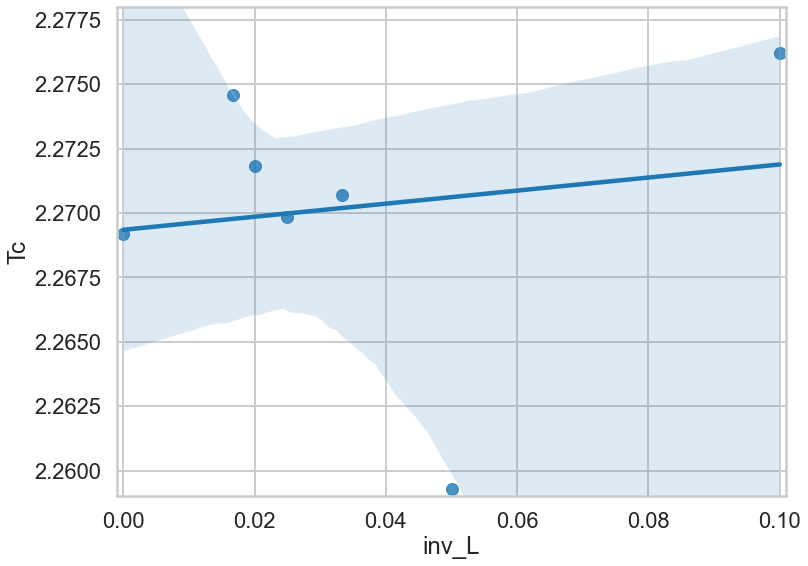

In [30]:
# fig, ax = plt.subplots(figsize=(12,9))
# ax = sns.regplot(x="inv_L", y="Tc", data=intersections)
# ax.set_ylim([2.259, 2.278])
# ax.set_xlim([-0.001, 0.101])